1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
- Anomaly detection, also known as outlier detection, is the process of identifying data points, events, or observations that deviate significantly from the "normal" behavior of a dataset.
Types of Anomaly:-
(1) Point Anomalies - A point anomaly is the simplest form of outlier. It occurs when a single data point is significantly different from the rest of the data. If you plot the data, these points usually stand far away from the main clusters.
Example: In credit card fraud detection, if a person who typically spends 20–50 per transaction suddenly has a single charge for 10,000, that individual transaction is a point anomaly.

(2) Contextual Anomalies - A contextual anomaly (also called a conditional anomaly) occurs when a data point is considered anomalous only in a specific context. The value itself might be "normal" in general, but it is out of place given the surrounding circumstances or time.
Example: A temperature reading of 30°C (86°F) is perfectly normal in the summer. However, if that same temperature is recorded in the middle of winter in Antarctica, it is a contextual anomaly.

(3) Collective Anomalies - A collective anomaly happens when a group of data points—which might look normal individually—deviate from the norm when they occur together. The sequence or the combination of these points is what indicates the anomaly.
Example: In a human heartbeat (ECG), a single low-voltage signal might be normal. However, if a specific sequence of low-voltage signals occurs repeatedly for an extended period, that entire "collection" of signals is an anomaly indicating a potential heart problem.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
- (1)Isolation Forest - Approach: Isolation (Tree-Based) Unlike most algorithms that try to define "normal" and then find what doesn't fit, Isolation Forest explicitly isolates anomalies. It works on the principle that anomalies are few and different, making them easier to "partition" than normal points.
-> Logic: Anomalies = Short path lengths; Normal = Long path lengths.
-> Suitable Use Cases:
1- High-dimensional data: It scales very well and isn't bogged down by the "curse of dimensionality."
2- Global Outliers: Best for finding points that are generally far away from all clusters.

(2) DBSCAN (Density-Based Spatial Clustering of Applications with Noise) - Approach: Density-Based Clustering DBSCAN is primarily a clustering algorithm, but it is excellent for anomaly detection because it labels any point that doesn't belong to a high-density cluster as noise (anomalies).
-> Logic: Anomalies = Points in low-density regions that don't meet the threshold to be part of a cluster.
-> Suitable Use Cases:
1- Non-linear shapes: Great if your data clusters are shaped like circles, crescents, or waves.
2- Automatic Cluster Discovery: You don't need to tell it how many clusters to expect.

(3) Local Outlier Factor (LOF) - Approach: Local Density Deviation LOF is unique because it focuses on local anomalies. It compares the density of a data point to the density of its neighbors. A point might be "normal" in a global sense but an anomaly when compared to the specific group it is near.
-> Logic: If a point's density is much lower than its neighbors' densities, it's an outlier.
-> Suitable Use Cases:
1- Variable Density: When your data has clusters of different densities (e.g., one very tight cluster and one very loose one).
2- Contextual/Local Outliers: Finding a "black sheep" within a specific group.

3. What are the key components of a Time Series? Explain each with one
example.
- The 4 Components of Time Series-
(1) Trend - The Trend represents the long-term increase or decrease in the data. It reflects the overall "direction" the data is moving over a long period, ignoring short-term fluctuations
Example: The steady increase in global temperature over the last 100 years due to climate change.

(2) Seasonality - Seasonality refers to patterns that repeat at regular, fixed intervals within a year (e.g., daily, weekly, or monthly). These are usually tied to the calendar or specific events.
Example: An increase in retail sales every year during the month of December due to holiday shopping.

(3) Cyclical Component - The Cyclical component refers to fluctuations that occur over a long duration (usually more than a year) but do not have a fixed, predictable frequency. These are often tied to economic or business cycles.
Example: The boom-and-bust cycles of the housing market, which might last 5 to 10 years before repeating.

(4) Irregular (Noise/Residual) - The Irregular component consists of random, unpredictable fluctuations that remain after the trend, seasonality, and cycles are removed. These are often caused by "one-off" events or pure randomness.
Example: A sudden drop in airline ticket sales due to a surprise volcanic eruption that grounds flights for three days.

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
- In time series analysis, a Stationary series is one whose statistical properties—such as mean, variance, and autocorrelation—do not change over time. Essentially, the "rules" that govern the data remain constant, making it much easier to model and predict.
If a series is non-stationary (e.g., it has a trend or changing seasonality), most traditional forecasting models like ARIMA will struggle because they assume the future will behave like the past.
-> How to Test for Stationarity-
1- Augmented Dickey-Fuller (ADF) Test
This is the most common "Unit Root" test.
(1) Null Hypothesis: The series is non-stationary.
(2) Result: If the p-value is less than 0.05, you reject the null hypothesis and conclude the series is stationary.
2- KPSS Test-
This is often used as a complement to the ADF test.
(1) Null Hypothesis: The series is stationary.
(2) Result: If the p-value is less than 0.05, the series is non-stationary.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
- (1) AR (Autoregressive)-
Structure: The AR model predicts the future based on a linear combination of its own past values. The "order" $p$ determines how many previous steps the model looks back.
(2) MA (Moving Average)-
Structure: Unlike AR, the MA model uses past forecast errors (the "shocks") to predict the future. The order $q$ determines the number of past error terms included.
(3) ARIMA (AutoRegressive Integrated Moving Average)-
Structure: This is a powerhouse that combines AR and MA but adds the Integrated (I) component. The "I" represents differencing ($d$) to make a non-stationary series stationary.
(4) SARIMA (Seasonal ARIMA)-
Structure: This extends ARIMA by adding seasonal components. It doesn't just look at the previous day; it looks at the same time in the previous season (e.g., this Monday vs. last Monday).
(5) SARIMAX (SARIMA with eXogenous variables)-
Structure: The "X" stands for Exogenous, meaning "external factors." This model does everything SARIMA does, but it also allows you to include other datasets that might influence the target variable





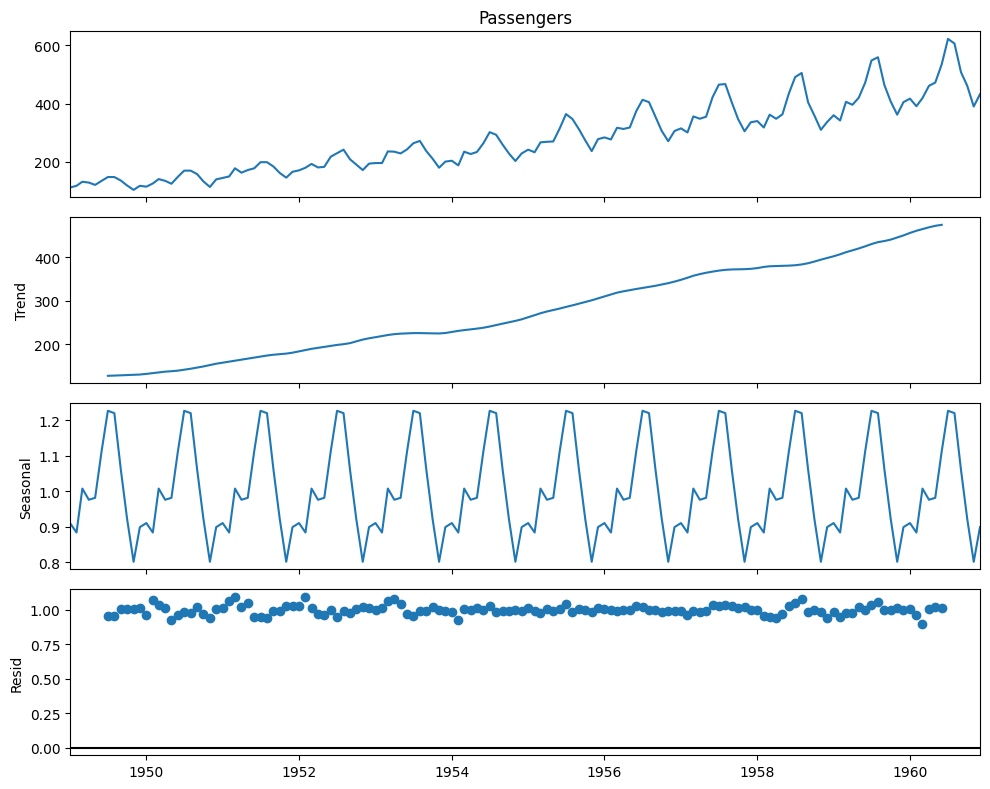

In [1]:
#6 Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)


plt.rcParams.update({'figure.figsize': (10, 8)})
result.plot()
plt.tight_layout()
plt.show()

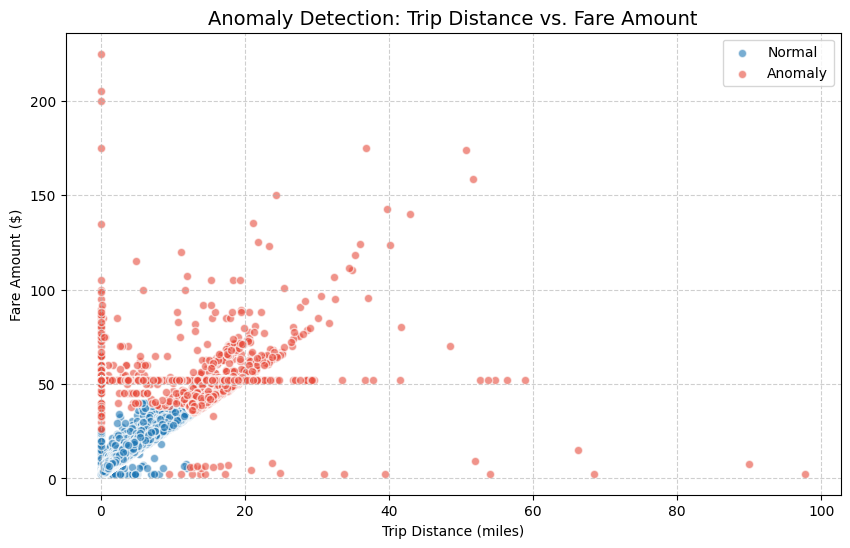

In [2]:
#7 Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


url = 'https://raw.githubusercontent.com/dotnet/machinelearning-samples/main/datasets/taxi-fare-train.csv'
df = pd.read_csv(url)
data = df[['trip_distance', 'fare_amount']].dropna()


model = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
data['anomaly_score'] = model.fit_predict(data[['trip_distance', 'fare_amount']])


data['status'] = data['anomaly_score'].map({1: 'Normal', -1: 'Anomaly'})


plt.figure(figsize=(10, 6))
colors = {'Normal': '#1f77b4', 'Anomaly': '#e74c3c'}

for status, color in colors.items():
    subset = data[data['status'] == status]
    plt.scatter(subset['trip_distance'], subset['fare_amount'],
                c=color, label=status, alpha=0.6, edgecolors='w')

plt.title('Anomaly Detection: Trip Distance vs. Fare Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('nyc_taxi_anomalies.png')
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


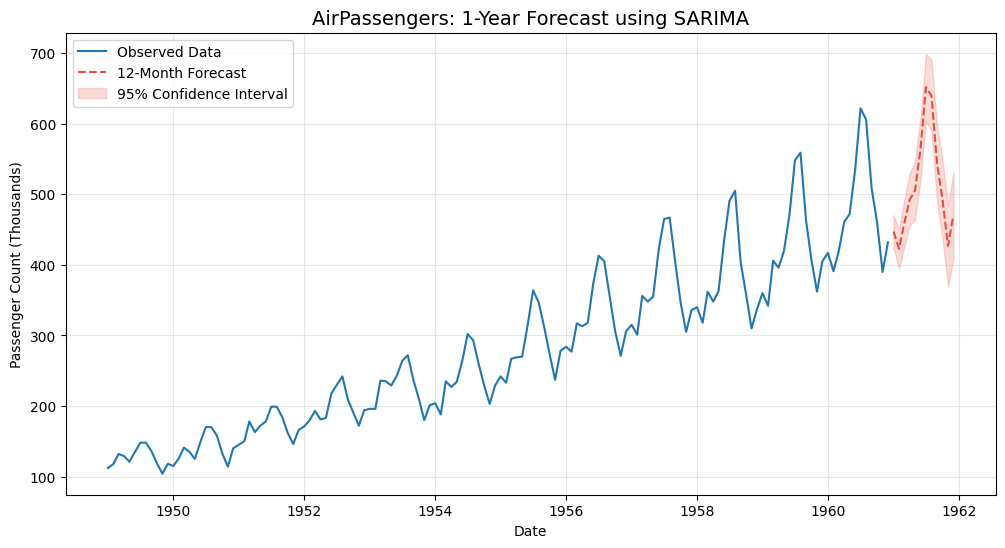

In [3]:
#8 Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')


order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)


model = SARIMAX(df['Passengers'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)


forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Observed Data', color='#1f77b4')
plt.plot(forecast_df.index, forecast_df['mean'], label='12-Month Forecast', color='#e74c3c', linestyle='--')


plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'],
                 color='#e74c3c', alpha=0.2, label='95% Confidence Interval')

plt.title('AirPassengers: 1-Year Forecast using SARIMA', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Passenger Count (Thousands)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()


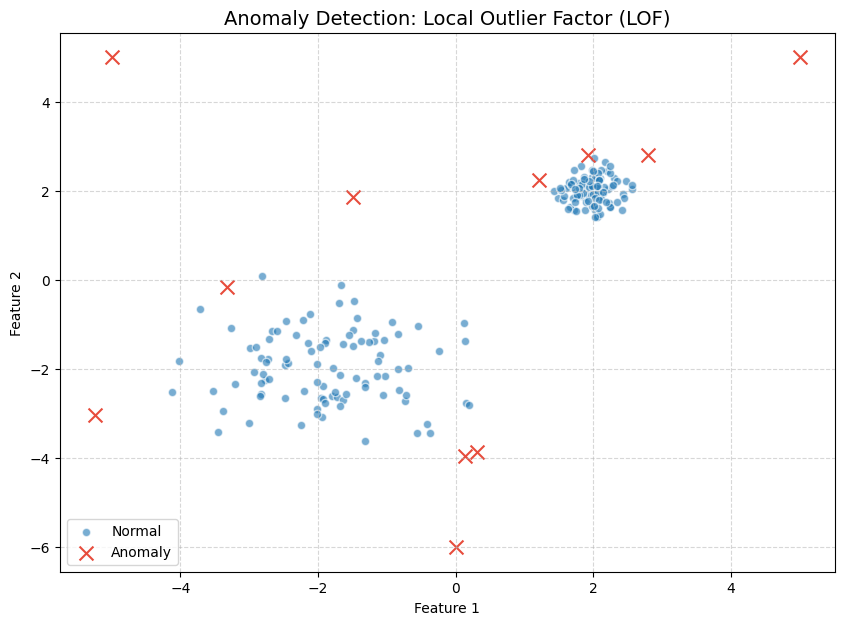

In [1]:
#9 Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


np.random.seed(42)


X_dense = 0.3 * np.random.randn(100, 2) + [2, 2]

X_sparse = 1.0 * np.random.randn(100, 2) + [-2, -2]


X_outliers = np.array([[5, 5], [-5, 5], [0, -6], [2.8, 2.8]])

X = np.r_[X_dense, X_sparse, X_outliers]


lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)


is_anomaly = (y_pred == -1)


plt.figure(figsize=(10, 7))

plt.scatter(X[~is_anomaly, 0], X[~is_anomaly, 1],
            color='#1f77b4', label='Normal', alpha=0.6, edgecolors='w')


plt.scatter(X[is_anomaly, 0], X[is_anomaly, 1],
            color='#e74c3c', label='Anomaly', s=100, marker='x')

plt.title('Anomaly Detection: Local Outlier Factor (LOF)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

- (1) Real-Time Anomaly Detection:-
To detect abnormal spikes or drops (like equipment failure or illegal tapping), I would prioritize Isolation Forest.
-> Why Isolation Forest?
Efficiency: It is computationally lightweight, which is critical for real-time streaming data where decisions must be made in seconds.

Trend Resilience: Unlike DBSCAN, which relies on absolute spatial density, Isolation Forest can handle the "fanning out" of data (heteroscedasticity) common in energy usage.

(2) Short-Term Forecasting:-
For forecasting energy demand, the ideal model is SARIMAX.
Why SARIMAX?

S (Seasonal): Energy demand is hyper-seasonal. It follows daily cycles (day vs. night) and weekly cycles (weekdays vs. weekends).

X (Exogenous): This is the most critical component. Energy demand is heavily dictated by weather conditions. If the temperature spikes to 40°C, air conditioning usage will soar. SARIMAX allows us to feed in weather forecasts as external variables to adjust the demand prediction.

(3) Validation and Monitoring:-
Performance in power grids is not static; it "drifts" as cities grow or seasons change.

Rolling Window Validation: Instead of a simple train-test split, I would use a rolling window approach. The model trains on the last 30 days and predicts the next 24 hours, sliding forward every hour.

Error Metrics: * MAPE (Mean Absolute Percentage Error): Useful for business stakeholders to understand error in terms of "percentage off."

(4) Business and Operational Impact:-
This data-driven approach moves the company from reactive to predictive operations:

Load Balancing: By forecasting a spike 4 hours in advance, the grid can purchase or activate reserve power (e.g., turning on a peaking power plant) before a shortage occurs.

Infrastructure Health: Detecting a sudden "drop" in a specific region through an anomaly alert can trigger an automated dispatch of a repair crew to a potentially downed transformer before customers even call to report it.

In [2]:
# code of above question
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest


data = {
    'usage': [250, 255, 260, 400, 265, 270, 268], # 400 is an anomaly
    'temp': [22, 22, 23, 35, 23, 24, 23]
}
df = pd.DataFrame(data)


iso_forest = IsolationForest(contamination=0.1)
df['anomaly'] = iso_forest.fit_predict(df[['usage']])



model = SARIMAX(df['usage'], exog=df['temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit(disp=False)


forecast = model_fit.forecast(steps=1, exog=[[25]])

print(f"Anomaly Detection Labels: {df['anomaly'].tolist()}")
print(f"Next 15-min Demand Forecast: {forecast.values[0]:.2f} MW")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Anomaly Detection Labels: [1, 1, 1, -1, 1, 1, 1]
Next 15-min Demand Forecast: 382.33 MW


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
